In [4]:
from canonicalGPIsland import CanonicalGeneticProgrammingIsland
from primitives import *
from competition import *
from snake_eyes.snakeeyes import readConfig

import matplotlib.pyplot as plt
import json

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
config = readConfig('./configs/TestTraditional.cfg', globals(), locals())
for key in config:
    print(key)
    print(config[key])

DEFAULT
{}
GENERAL
{'render': False, 'default_test': False, 'analysis': False, 'logpath': 'logs/debug', 'experimentName': 'traditionalTest', 'runs': 2, 'evaluations': 50000, 'numChampions': 5, 'numHeroes': 15, 'parallelizeRuns': True, 'popSize': 200, 'numChildren': 100, 'parentSelection': 'FPS', 'kParent': 10, 'mutation': 0.05, 'survivalStrategy': 'plus', 'survivalSelection': 'truncation', 'depthLimit': 5, 'hardLimit': 20, 'depthMin': 1, 'outputType': 'Angle'}
ISLAND
{'populations': {'predators': 'predators', 'prey': 'prey'}, 'evaluationFunction': <function sampleEvaluations at 0x10706e9e0>, 'evaluationkwargs': {'samples': 10, 'world_kwargs': {'predator_move_speed': 0.06, 'prey_move_speed': 0.1, 'agent_radius': 0.1, 'time_limit': 200}, 'hallOfFameSize': 3}, 'evaluations': 50000, 'championsPerGeneration': 5}
predators
{'roles': ('General', 'Predator'), 'outputType': 'Angle', 'depthLimit': 5, 'hardLimit': 20, 'depthMin': 1, 'popSize': 200, 'numChildren': 100, 'evaluations': 50000, 'paren

In [5]:
island = CanonicalGeneticProgrammingIsland(**config['ISLAND'], **config)

In [6]:
for population in island.populations:
    print(population)
    print([ind.fitness for ind in island.populations[population].population])
# preyPop.rampedHalfAndHalf()
# print(len(preyPop.population))

predators
[50.3, 43.1, 105.6, 59.6, 67, 71.4, 36.1, 57, 51.9, 43.6, 53.2, 74.4, 70.5, 51.4, 0, 51.1, 42.9, 40.8, 37.2, 22.1, 36.3, 58.3, 58.1, 33.3, 130.5, 50.3, 108.3, 80.3, 45.3, 49.4, 41.3, 137.1, 97.5, 48.7, 38.9, 35.8, 35.8, 97.5, 49.1, 38, 77.3, 39, 18.5, 16.2, 35.1, 37.7, 72, 9, 66.7, 98.5, 64.8, 36.3, 65.1, 69.2, 122.7, 78.2, 56.2, 51.5, 49.8, 117, 90.1, 27, 70.2, 179.2, 52.1, 54.6, 18.4, 41.8, 36.2, 21.7, 68.3, 19.2, 37.8, 90.6, 33.4, 150.4, 72.2, 79.8, 44.8, 20.5, 19.4, 154, 116.1, 8.6, 107, 29.6, 16, 65.6, 38, 71.6, 54.6, 21.9, 52.7, 47.8, 81.7, 134.2, 42, 44.5, 56.1, 49.4, 17.9, 178, 59.7, 45.7, 75.3, 88.5, 73.7, 20.9, 144.4, 21.6, 185.8, 116.9, 119.9, 127.3, 29.9, 92.5, 18, 57.1, 35.8, 41.3, 19.4, 46.3, 32.6, 40.9, 111.1, 55.3, 167.9, 52, 164.7, 188, 74.9, 72.1, 16.2, 38.7, 124, 111, 37.6, 149.2, 0, 71.8, 103.1, 56.1, 185.9, 114.2, 25.2, 92.9, 32.5, 55, 46.4, 104.1, 109.7, 37.6, 17.3, 42, 26.2, 38.6, 37.4, 54.7, 20.2, 47, 54.1, 114.5, 73.5, 37.7, 107.3, 35.3, 51.4, 32.5, 3

In [7]:
island.generation()
for population in island.populations:
    print(population)
    print([ind.fitness for ind in island.populations[population].population])
# for prey in preyPop.population:
#     _, prey.fitness, _, _, _ = evaluate(prey=prey.genotype)
# print([ind.fitness for ind in preyPop.population])

predators
[114.8, 24.3, 61.4, 42.1, 59.3, 17.7, 17.7, 9.6, 15.5, 38.3, 115.9, 97.6, 69.3, 46.8, 128.2, 70.7, 35.7, 51.7, 92.1, 42.6, 140.3, 186.2, 0, 69.6, 82.1, 82.7, 55.3, 58, 47.8, 104.4, 73.5, 19.4, 16.4, 47, 34.7, 92.7, 65.9, 19.9, 36.6, 34.7, 43.6, 46.3, 43.2, 17.7, 107.3, 37.1, 78.2, 44.9, 183.6, 181, 77.7, 92.2, 129.7, 90.5, 181.4, 143.1, 180.9, 51.8, 37.1, 96.4, 182.8, 186.5, 71, 50.9, 69.6, 15.5, 86.6, 91.8, 47.7, 101.8, 44.4, 35, 184, 73.7, 72.4, 180.3, 53.8, 80, 178.3, 29.4, 20.3, 37.4, 64.9, 53.7, 158.6, 78, 61.5, 25.2, 81, 125.8, 38.7, 167.5, 69, 65.7, 33.6, 52.4, 119.9, 17.1, 109.5, 66.6, 32.1, 14, 39.8, 33.9, 75.5, 27.9, 53.2, 181.1, 101.2, 38.6, 18.5, 47.2, 70.9, 16.6, 37.7, 41, 40.3, 64.3, 92.6, 54.4, 184.4, 0, 24.2, 45.7, 54.5, 148.1, 15.7, 73.7, 26, 55.8, 35.1, 49.5, 29.8, 46, 30.1, 33.6, 19, 65.7, 106.6, 186.8, 54.4, 35, 107.6, 60.7, 53, 74.3, 78.2, 184.2, 56.6, 9.1, 183.6, 70.3, 54.2, 34.8, 164.3, 27.6, 47.4, 27, 16.3, 0, 36.4, 57.1, 57.6, 50.6, 186, 24.2, 36.5, 2

Generation 0	avgPred: 67.181	bestPred: 182.7	avgPrey: 132.819	bestPrey: 200	evals: 2000	
Generation 1	avgPred: 66.691	bestPred: 185.9	avgPrey: 133.309	bestPrey: 200	evals: 4000	
Generation 2	avgPred: 73.97636363636363	bestPred: 185.72727272727272	avgPrey: 123.42863636363636	bestPrey: 200	evals: 6200	
Generation 3	avgPred: 83.74375	bestPred: 186	avgPrey: 110.43625	bestPrey: 200	evals: 8600	
Generation 4	avgPred: 94.885	bestPred: 185.92307692307693	avgPrey: 104.1873076923077	bestPrey: 173.23076923076923	evals: 11200	
Generation 5	avgPred: 114.75	bestPred: 185.92307692307693	avgPrey: 81.89692307692307	bestPrey: 172.07692307692307	evals: 13800	
Generation 6	avgPred: 121.92461538461538	bestPred: 185.30769230769232	avgPrey: 77.72615384615385	bestPrey: 177.53846153846155	evals: 16400	
Generation 7	avgPred: 128.87192307692308	bestPred: 185.69230769230768	avgPrey: 64.44615384615385	bestPrey: 200	evals: 19000	
Generation 8	avgPred: 128.8976923076923	bestPred: 178.69230769230768	avgPrey: 52.46923

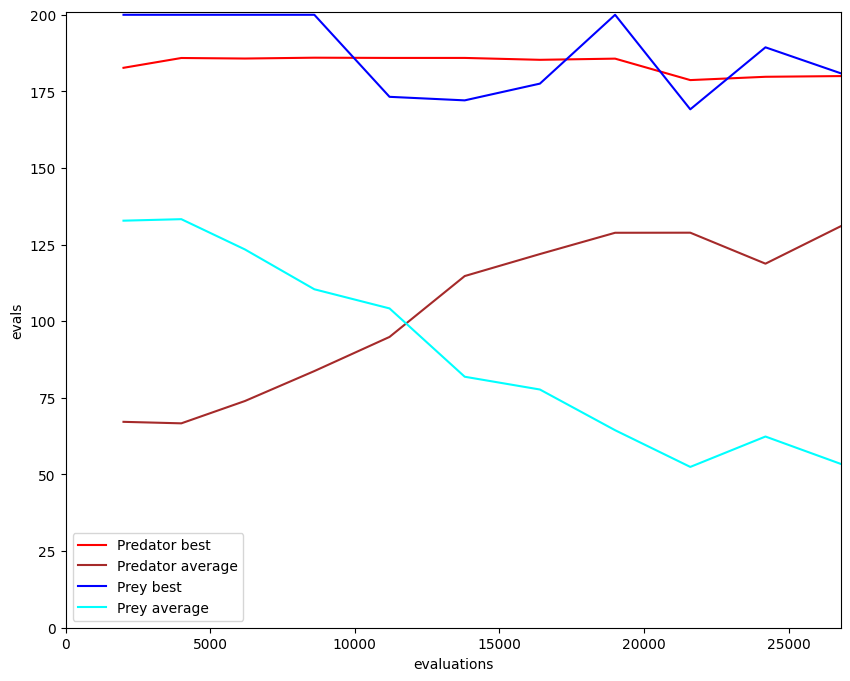

In [8]:
generation = 0
island = CanonicalGeneticProgrammingIsland(**config['ISLAND'], **config)
print(f'Generation {generation}', end='\t')
for key in island.log:
    if 'Abs' not in key:
        print(f'{key}: {island.log[key][-1]}', end='\t')
print('')

while generation < 10:
    island.generation()
    generation += 1
    print(f'Generation {generation}', end='\t')
    for key in island.log:
        if 'Abs' not in key:
            print(f'{key}: {island.log[key][-1]}', end='\t')
    print('')

evals = island.log['evals']
bestPred = island.log['bestPred']
avgPred = island.log['avgPred']
bestPrey = island.log['bestPrey']
avgPrey = island.log['avgPrey']
plt.plot(evals, bestPred, color = "red", label = "Predator best")
plt.plot(evals, avgPred, color = "brown", label = "Predator average")
plt.plot(evals, bestPrey, color = "blue", label = "Prey best")
plt.plot(evals, avgPrey, color = "cyan", label = "Prey average")
plt.ylabel(key)
plt.xlabel("evaluations")
plt.legend()
plt.ylim(bottom=0, top=201)
plt.xlim(left=0, right = evals[-1])

plt.show()

In [9]:
island = CanonicalGeneticProgrammingIsland(**config['ISLAND'], **config)
print('start', end='\t')
for key in island.log:
    if 'Abs' not in key:
        print(f'{key}: {island.log[key][-1]}', end='\t')
print('')
island.run()
print('finish', end='\t')
for key in island.log:
    if 'Abs' not in key:
        print(f'{key}: {island.log[key][-1]}', end='\t')
print('')

start	avgPred: 60.8185	bestPred: 189.7	avgPrey: 139.1815	bestPrey: 200	evals: 2000	


  0%|          | 0/50000 [00:00<?, ? evals/s]

finish	avgPred: 117.66730769230769	bestPred: 179.23076923076923	avgPrey: 87.87653846153846	bestPrey: 165.3846153846154	evals: 42400	


In [ ]:
json.dumps(island.log)

In [10]:
print(island.champions)

{'predators': {'angle_to_prey(context)': <maelstrom.genotype.GeneticTree object at 0x13a85e110>, 'average_angles(prey_last_move(context),if_greater_than(distance_to_centerPredator(context),1.6135040899169004,flip_angle(subtract_angles(angle_to_centerPredator(context),angle_to_prey(context))),angle_to_prey(context)))': <maelstrom.genotype.GeneticTree object at 0x13a85e1a0>, 'if_greater_than(1.2723027917540326,divide_distances(subtract_distances(distance_to_wallPredator(context),subtract_distances(distance_to_centerPredator(context),distance_to_wallPredator(context))),distance_to_wallPredator(context)),angle_to_prey(context),angle_to_prey(context))': <maelstrom.genotype.GeneticTree object at 0x13a85e650>, 'if_greater_than(0.3373199924439705,0.5604602856160181,angle_to_centerPredator(context),angle_to_prey(context))': <maelstrom.genotype.GeneticTree object at 0x13a472e90>, 'if_greater_than(subtract_distances(add_distances(subtract_distances(distance_to_opponent(context),1.4367562157328),s